# Introduction

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the datasets

covid = pd.read_csv("covid.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
# Checking missing values
covid.isnull().sum()

# Replacing missing values
covid["Province/State"].fillna("Unavailable", inplace=True)

In [5]:
covid = pd.melt(covid, id_vars=["ObservationDate","Country/Region"], var_name="Case",
        value_vars=["Confirmed", "Deaths", "Recovered"], value_name="Freq")
covid

,ObservationDate,Country/Region,Case,Freq
0,01/22/2020,Mainland China,Confirmed,1.0
1,01/22/2020,Mainland China,Confirmed,14.0
2,01/22/2020,Mainland China,Confirmed,6.0
3,01/22/2020,Mainland China,Confirmed,1.0
4,01/22/2020,Mainland China,Confirmed,0.0
...,...,...,...,...
70438,05/10/2020,US,Recovered,0.0
70439,05/10/2020,Mainland China,Recovered,73.0
70440,05/10/2020,Canada,Recovered,0.0
70441,05/10/2020,Mainland China,Recovered,183.0


In [6]:
# Sorting dataframe by Date and Country
covid = covid.sort_values(["ObservationDate", "Country/Region"], ascending=True)

In [7]:
covid.head()

,ObservationDate,Country/Region,Case,Freq
12,01/22/2020,Hong Kong,Confirmed,0.0
23493,01/22/2020,Hong Kong,Deaths,0.0
46974,01/22/2020,Hong Kong,Recovered,0.0
35,01/22/2020,Japan,Confirmed,2.0
23516,01/22/2020,Japan,Deaths,0.0


In [8]:
# Reading second dataset for confirmed cases
covid_confirmed = pd.read_csv("covid_confirmed.csv")
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [9]:
# Converting dates into long format using "melt" function
covid_confirmed2 = covid_confirmed.melt(id_vars=["Country/Region", "Lat", "Long"], var_name="Date",
                    value_vars=["1/22/20","5/10/20"], value_name="Cases")

In [10]:
# Checking for missing values
covid_confirmed2.isnull().sum()

# Replacing missing values
#covid_confirmed2["Province/State"].fillna("Missing", inplace=True)

Country/Region    0
Lat               0
Long              0
Date              0
Cases             0
dtype: int64

In [11]:
# Converting data types into dates for both datasets
covid_confirmed2['Date'] = pd.to_datetime(covid_confirmed2['Date'])
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

# Data Visualization

In [43]:
# Aggregating results and renaming aggregated result
covid_group = covid.groupby(['ObservationDate','Case'])['Freq'].sum().reset_index(name= "Freq")
covid_group


,ObservationDate,Case,Freq
0,2020-01-22,Confirmed,555.0
1,2020-01-22,Deaths,17.0
2,2020-01-22,Recovered,28.0
3,2020-01-23,Confirmed,653.0
4,2020-01-23,Deaths,18.0
...,...,...,...
325,2020-05-09,Deaths,279311.0
326,2020-05-09,Recovered,1375624.0
327,2020-05-10,Confirmed,4101699.0
328,2020-05-10,Deaths,282709.0


In [39]:
# Converting data types
covid_group["Case"] = covid_group["Case"].astype('category')
covid_group["Freq"] = covid_group["Freq"].astype(int)
covid_group.head()

,ObservationDate,Case,Freq
0,2020-01-22,Confirmed,555
1,2020-01-22,Deaths,17
2,2020-01-22,Recovered,28
3,2020-01-23,Confirmed,653
4,2020-01-23,Deaths,18


In [48]:
# Confirmed cases
covid_confirmed = covid_group[covid_group["Case"].isin(["Confirmed"])]
covid_confirmed

,ObservationDate,Case,Freq
0,2020-01-22,Confirmed,555.0
3,2020-01-23,Confirmed,653.0
6,2020-01-24,Confirmed,941.0
9,2020-01-25,Confirmed,1438.0
12,2020-01-26,Confirmed,2118.0
...,...,...,...
315,2020-05-06,Confirmed,3755341.0
318,2020-05-07,Confirmed,3845718.0
321,2020-05-08,Confirmed,3938064.0
324,2020-05-09,Confirmed,4024009.0


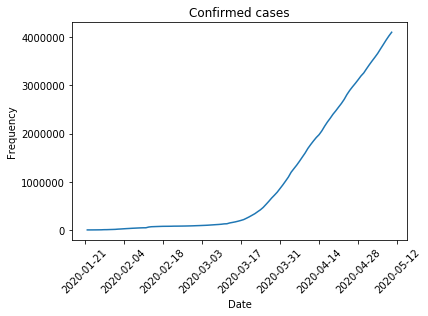

In [58]:
# Plotting data 
def plot():
    
    plt.plot(covid_confirmed["ObservationDate"], covid_confirmed["Freq"])
    plt.xticks(rotation=45)
    plt.title("Confirmed cases")
    plt.xlabel("Date")
    plt.ylabel("Frequency")
    plt.show()
plot()